In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import bernoulli
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.utils import shuffle
from tqdm import tqdm

In [2]:
def rbf(x,y,l_squared=1):
    """Gaussian kernel

    Parameters
    -------------------------------
    x : float
    a real number

    y : float
    a real number

    l: float, non zero
    a scale parameter
    -------------------------------
    """
    dim = x.shape[0]
    vect = np.zeros(dim)
    type_x = x.shape
    type_y = y.shape
    if len(type_x) == len(type_y):
        d = np.exp(-((np.linalg.norm(x-y))**2)/(2*l_squared))
        return d
    else :
        for i in range(dim):
            vect[i] = np.exp(-((np.linalg.norm(x[i] - y))**2)/(2*l_squared))
        return vect

In [3]:
np.random.seed(1457065)
n_gen = 50
n_samples = 4*n_gen
data_red_1 = np.random.multivariate_normal(mean=np.array([0.5,0.5]),
                                             cov=np.array(([2,-0.5],[-0.5,2])),
                                             size=n_gen)
data_red_2 = np.random.uniform(low=0.5, high=2, size=(n_gen,2))

data_blue_1 = np.random.multivariate_normal(mean=np.array([-1,-1]),
                                            cov=np.eye(2),
                                            size=n_gen)
data_blue_2 = np.random.uniform(low=-1, high=0., size=(n_gen,2))

data_red = np.vstack((data_red_1,data_red_2))
labels_red = (np.ones(2*n_gen)*-1).reshape(2*n_gen,1)
data_red = np.hstack((data_red,labels_red))

data_blue = np.vstack((data_blue_1, data_blue_2))
labels_blue = (np.ones(2*n_gen)).reshape(2*n_gen,1)
data_blue = np.hstack((data_blue,labels_blue))

whole_data = np.vstack((data_blue, data_red))

In [4]:
gamma = 1
good_ratio = 1/2

up_data_np = whole_data[:,:2]
labels = whole_data[:,2].reshape(1,-1)
first_row = np.hstack((np.array(0).reshape(1,1),labels))

#computation of omega and the coefficients
omega = np.zeros((n_samples,n_samples))
for i in range(n_samples):
    for k in range(i,n_samples):
        omega[i,k] = rbf(x=up_data_np[i,:],y=up_data_np[k,:],l_squared=4)*labels[0,i]*labels[0,k]
    omega[i,i] = 1

bot_right = omega + gamma*np.eye(n_samples)
bot = np.hstack((whole_data[:,2].reshape(n_samples,1), bot_right))
whole_mat = np.vstack((first_row, bot))

del bot_right, bot, first_row

right_side = np.vstack((np.zeros(1).reshape(1,1),np.ones(n_samples).reshape(n_samples,1)))

coeffs = np.linalg.solve(a=whole_mat,b=right_side)

b = coeffs[0]
alpha = coeffs[1:]

In [5]:
xx, yy = np.meshgrid(np.linspace(-4,5,500), np.linspace(-5,5,500))
results_plot = np.empty(500**2)
for i in tqdm(range(500**2)):
    results_plot[i] = (np.sum(alpha*whole_data[:,2]*rbf(x=whole_data[:,:2],y=np.c_[xx.ravel(), yy.ravel()][i,:],l_squared=4))-b)[0]
Z = results_plot
Z = Z.reshape(xx.shape)

100%|██████████| 250000/250000 [07:58<00:00, 522.59it/s]


/tmp/ipykernel_11484/2530146038.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


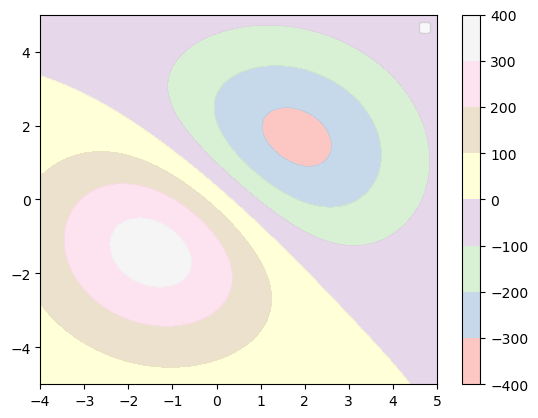

In [6]:
plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.Pastel1)
plt.legend()
plt.colorbar()

In [7]:
Z_bis = np.sign(Z)

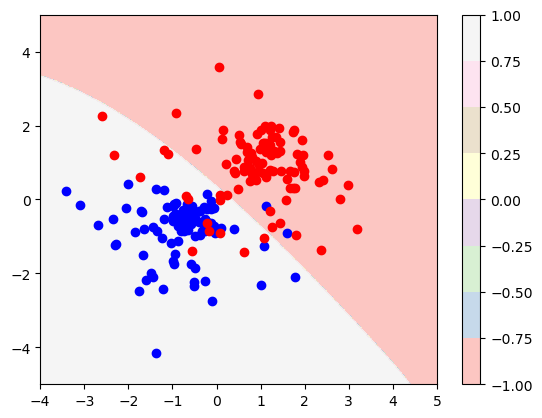

In [8]:
plt.contourf(xx, yy, Z_bis, alpha=0.75, cmap=plt.cm.Pastel1)
plt.plot(whole_data[:n_gen*2,0],whole_data[:n_gen*2,1],'bo')
plt.plot(whole_data[n_gen*2:,0],whole_data[n_gen*2:,1],'ro')
plt.colorbar()

In [9]:
b

array([0.27964055])